# Make section plots

This makes section plots for figuring out grid locations

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
#import cv2
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap
#import os
import os,sys
#import gsw

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

######################
#some ROMS tools examples 
######################

sys.path.append("/home/jacob13/CROCO-NH/Modules/") 
import R_tools as tools
#import R_tools_fort as toolsF

###################################################################################
# Use fortran order for arrays
####################################################################################

def Forder(var):
   return np.asfortranarray(var.T,dtype=np.float64)

####################################################################################


ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

ImportError: numpy.core.multiarray failed to import

In [7]:
import numpy.core.multiarray as MA


In [6]:
# Load PACBIG
file = '/data/thomas/bdelorme/PACBIG/pacbig_grd_nw_dig.nc'
pacbiggrid = xr.open_dataset(file)

# Load files (concatenate across all files)
filelocation = '/data/thomas/bdelorme/PACBIG/'
dspacbig = xr.open_mfdataset(filelocation+'*his*.nc', concat_dim='time',data_vars='minimal')
pacbigyearday = np.mod(dspacbig.ocean_time/86400, 360)

In [3]:
# Load WHITESHARK grid file
file = '/data/thomas/jacob13/WHITESHARKCAFE/WHITESHARK/whiteshark_grd.nc'
whitesharkgrid = xr.open_dataset(file)

# Load files (concatenate across all files)
filelocation = '/data/thomas/jacob13/WHITESHARKCAFE/WHITESHARK/'
dswhiteshark= xr.open_mfdataset(filelocation+'whiteshark_his*.nc', concat_dim='time')#, data_vars='minimal', compat='equals')
#dschesa= xr.open_dataset(filelocation+'chesa2_his.0096.nc')
whitesharkyearday = np.mod(dswhiteshark.scrum_time/86400, 360)

In [4]:
# Calculate z level
hc = dswhiteshark.hc
Cs_r = Forder(dswhiteshark.Cs_r)
Cs_w = Forder(dswhiteshark.Cs_w)

topo = Forder(whitesharkgrid.h.values)
zeta = Forder(dswhiteshark.zeta.values[0,:,:])

(z_r,z_w) = toolsF.zlevs(topo, zeta[:,:], hc, Cs_r, Cs_w)

In [8]:
np.min(np.diff(z_w))

4.671236319502598

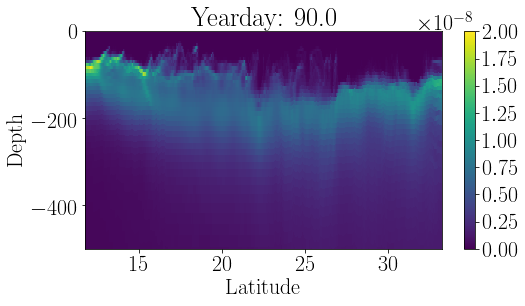

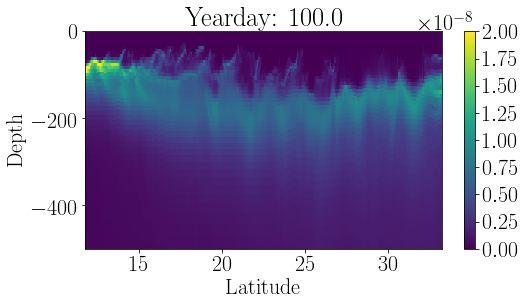

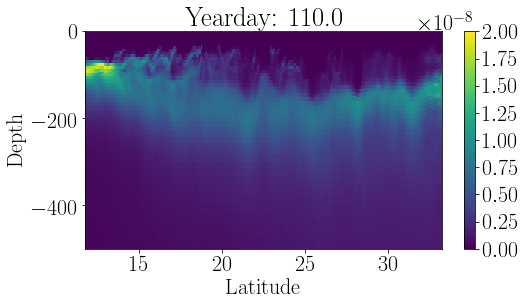

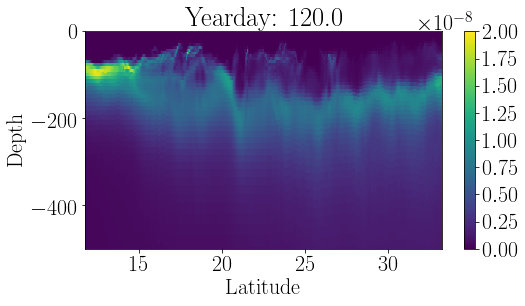

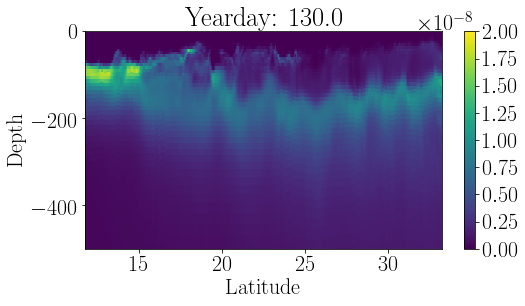

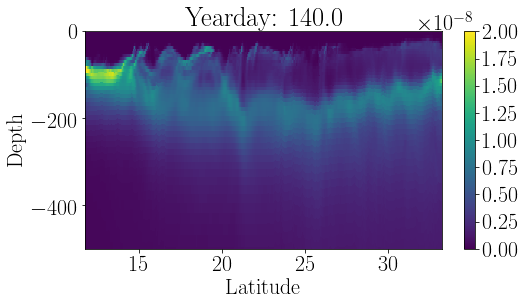

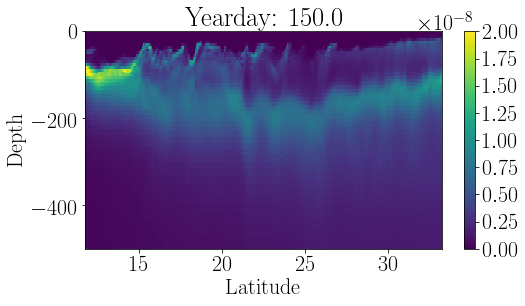

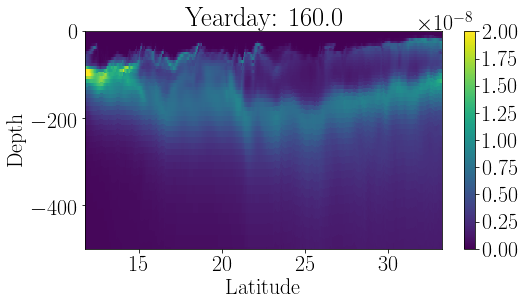

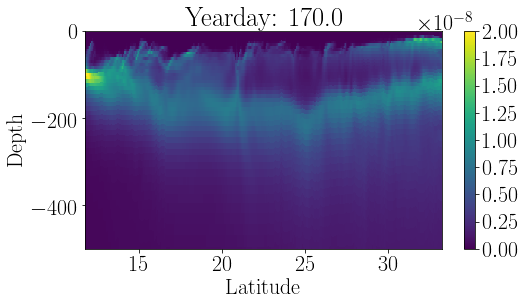

In [103]:
ts = 155+120
xi = 301
# Plot temperature along longitude line
for ts in range(155+90, 155+180, 10):
    Tslice = dswhiteshark.temp[ts,:,:,xi]
    Sslice = dswhiteshark.salt[ts,:,:,xi]
    Zrslice = (z_r[xi, :,:])
    Zwslice = (z_w[xi,:,:])
    Latslice = whitesharkgrid.lat_rho[:, xi]


    #Rhoslice = toolsF.rho_eos(Forder(Tslice), Forder(Sslice),(Zrslice), (Zwslice[:,1:]), 1030)
    rho = toolsF.rho_eos(Forder(dswhiteshark.temp[ts,:,:,:]), Forder(dswhiteshark.salt[ts,:,:,:]),z_r, z_w, 1030)
    b = -9.8*rho/1030

    bz = toolsF.bvf_eos(Forder(dswhiteshark.temp[ts,:,:,:]), Forder(dswhiteshark.salt[ts,:,:,:]),z_r, z_w, 1030)
    #whitesharkgrid.lon_rho
    #plt.plot(whitesharkgrid.lon_rho.values[:,300])
    #plt.pcolor(Latslice, Zslice, Sslice)
    PV = whitesharkgrid.f.values*Forder(bz)

    plt.figure(figsize=(8, 4))
    plt.pcolor(Latslice, Zslice, np.mean(PV[1:,:,xi-10:xi+10], axis=-1), vmin=0, vmax=2e-8)
    plt.ylim((-500, 0))
    plt.colorbar()
    plt.ylabel('Depth')
    plt.xlabel('Latitude')
    plt.title('Yearday: ' + str(whitesharkyearday.values[ts]))
    plt.savefig(f'/data/thomas/jacob13/WHITESHARKCAFE/WHITESHARK/Figs/PVSectionAvg_{ts}.png', bbox_inches='tight')

Text(0.5,1,'Yearday: 305.0')

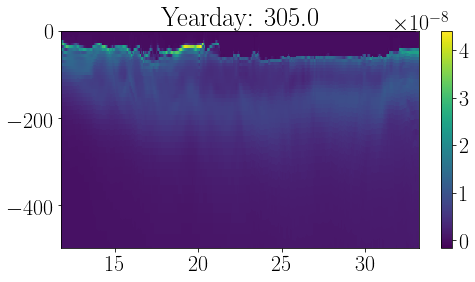

In [93]:
PV = whitesharkgrid.f.values*Forder(bz)
PV.shape

(81, 602, 602)

(0, 50)

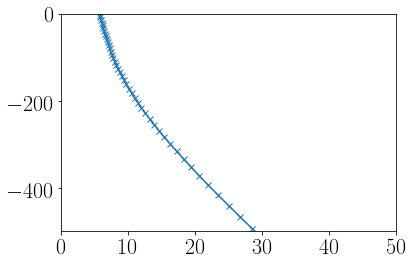

In [107]:
plt.plot(np.diff(z_w[0,0,:]), z_r[0,0,:], marker='x')
plt.ylim((-500, 0))
plt.xlim((0, 50))